# Different example
$$\min_x c^Tx-\sum_{i=1}^m\log(b_i-a_i^T x)$$

In [25]:
# Set the seed
# np.random.seed()
import numpy as np
from functions import *
m = 1000
n = 300

A = np.random.randn(m, n)
x0 = np.random.random(n)
b = A.dot(x0) + np.random.random(m)
c = np.random.randn(n)

f = lambda x: c.dot(x)-np.sum(np.log(b-A.dot(x)))
grad_f = lambda x: c+A.T.dot(1/(b-A.dot(x)))
nabla_f = lambda x: A.T.dot(np.diag(1/(b-A.dot(x))**2)).dot(A)

decrement = lambda dx, x: (dx.dot(nabla_f(x).dot(dx)))**2/2
dom_f = lambda x: np.all(b-A.dot(x)>0)


In [26]:
v_n = newton(f, grad_f, nabla_f, x0, A=A, b=b, dom_f=dom_f, MAXITERS=100, TOL=1e-8,alpha = 0.0001, beta = 0.5, print_iter=True, eq=False, N=1)

Iteration: 1, decrement: 288.4393253833
Iteration: 2, decrement: 222.7716292710
Iteration: 3, decrement: 162.8423771321
Iteration: 4, decrement: 80.6523786700
Iteration: 5, decrement: 38.0054865861
Iteration: 6, decrement: 13.6925070234
Iteration: 7, decrement: 7.0601569124
Iteration: 8, decrement: 4.8482389500
Iteration: 9, decrement: 5.5521462325
Iteration: 10, decrement: 2.7088792429
Iteration: 11, decrement: 0.1680197903
Iteration: 12, decrement: 0.0004810852
Iteration: 13, decrement: 0.0000000032


In [27]:
v_q = quasi_newton(f, grad_f, x0, A=A, b=b, dom_f=dom_f, MAXITERS=1000, TOL=1e-8, alpha = 0.0001, beta = 0.5, print_iter=False,N=1)

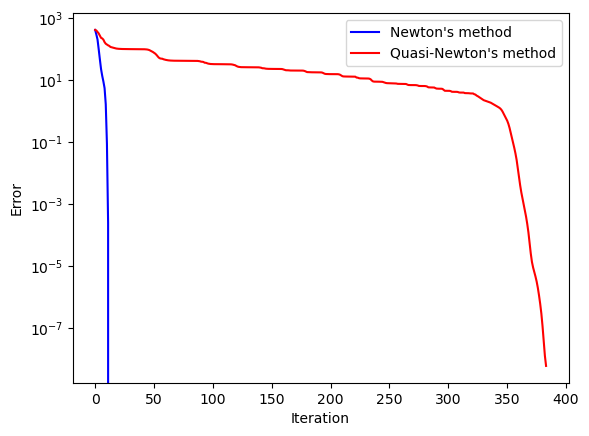

In [28]:

plot_error_iter(v_n, v_n[-1], "Newton's method")
plot_error_iter(v_q, v_n[-1], "Quasi-Newton's method",color='red')
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()